In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Задания

#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Сначала удалим столбец RowNumber, который дублирует информацию столбца Индекс: 

In [2]:
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Считаю количество лояльных и ушедших:

In [3]:
churn_data['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

Строю диаграмму в Matplotlib:

([<matplotlib.patches.Wedge at 0x7fe5d760ad30>,
 [Text(-0.962556155622219, 0.7165791284106557, 'Loyal'),
  Text(0.8823431426537006, -0.6568642010431012, 'Departed')],
 [Text(-0.5614910907796277, 0.41800449157288244, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

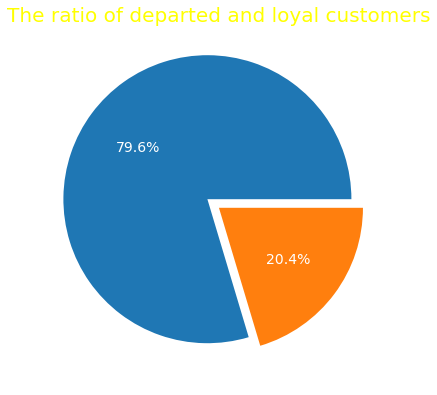

In [68]:
loyalty_ratio = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('The ratio of departed and loyal customers', fontsize=20, color='yellow')
axes.pie(
    loyalty_ratio,
    textprops=dict(color="w", size=14),
    labels=['Loyal', 'Departed'],
    autopct='%.1f%%',
    explode=[0.1, 0]
)

Комментарий: Количество ушедших достаточно велико. Работникам банка следует 
проанализировать ситуацию и выявить причину этого.

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [15]:
import plotly
import plotly.express as px
filter_balance = churn_data[churn_data['Balance'] > 2500]
fig = px.histogram(
    data_frame=filter_balance,
    x='Balance',
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
    nbins=25
)
fig.show()


По графику видно, что распределение баланса пользователей, у которых на счету больше 2 500 долларов, является нормальным без эксцессов. Модальное, медианное и среднее значения почти совпадают и находятся в районе 125 тысяч долларов США.

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

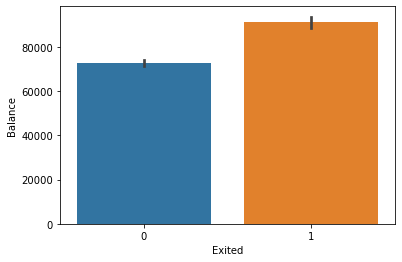

In [6]:
sns.barplot(
    data=churn_data, 
    x="Exited", 
    y="Balance"
    )

Заключение: По диаграмме видно, что у ушедших (1) баланс выше, чем у лояльных (0) клиентов банка. Это может говорить о том, что в банке отсутствовали какие-либо бонусы на размер вклада. Либо это может означать, что клиенты с бОльшими балансами были поставлены в менее выгодные условия нежели клиенты, у которых суммы вкладов меньше.

#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

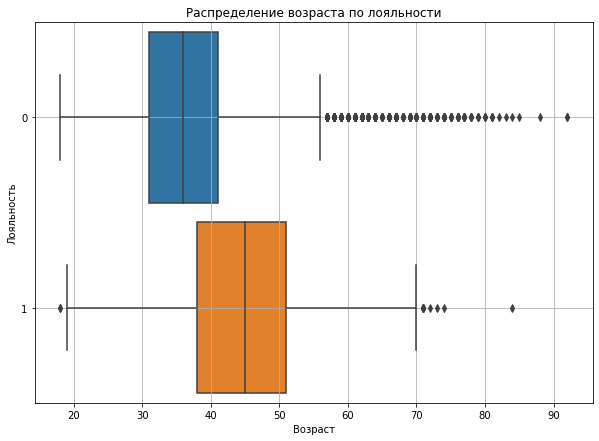

In [7]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста по лояльности');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

Заключение: По диаграмме видно, что медианный возраст ушедших 45 лет, в то же время медианный возраст лояльных около 36 лет. Разброс у лояльных больший, чем у ушедших. 
Банку следует обратить внимание на клиентов в возрасте от 40 до 50 лет. 

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента CreditScore и его предполагаемой зарплаты EstimatedSalary. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

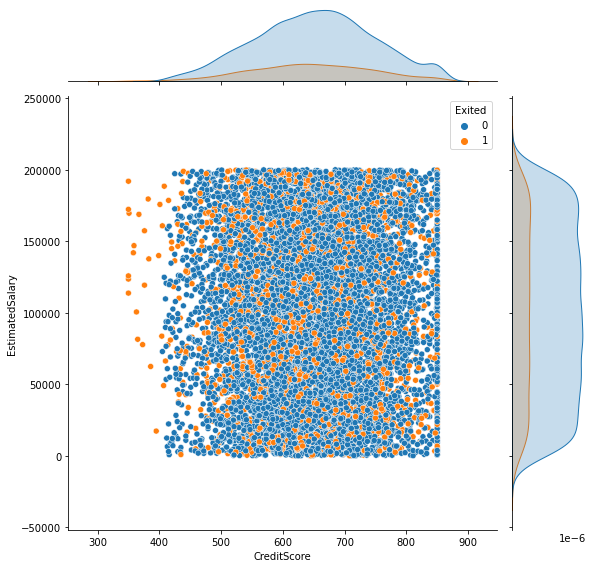

In [8]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    height=8
)

Заключение: По графику видно, что взаимосвязь кредитного рейтинга клиента CreditScore и его предполагаемой зарплаты EstimatedSalary подчиняется нормальному закону. Мода, медиана и средняя находятся на уровне значения кредитного рейтинга 670 независимо от уровня зарплаты. Лояльность клиентов при этом не оказывает влияния на данное распределение. При этом уровень зарплат и кредитный рейтинг в целом выше у лояльных клиентов.

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка

Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).


<AxesSubplot:xlabel='Gender', ylabel='Exited'>

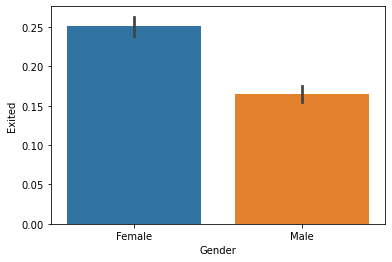

In [ ]:
sns.barplot(
    data=churn_data, 
    x='Gender', 
    y='Exited'
    )

Заключение: По графику видно, что чаще уходят женщины

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг NumOfProducts? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

<AxesSubplot:xlabel='NumOfProducts', ylabel='Count'>

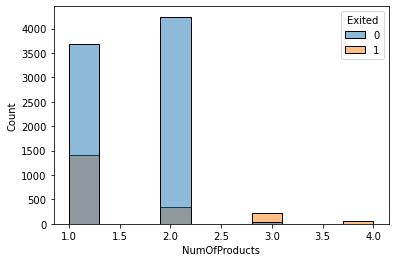

In [ ]:
sns.histplot(
    data=churn_data, 
    x='NumOfProducts', 
    binwidth=0.3, 
    hue='Exited')

Заключение: Из диаграммы видно, что лояльные клиенты имеют в среднем по 1-2 продукта, а ушедшие - по 3-4.

#### 9.8. Как влияет наличие статуса активного клиента  IsActiveMember на отток клиентов Exited? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

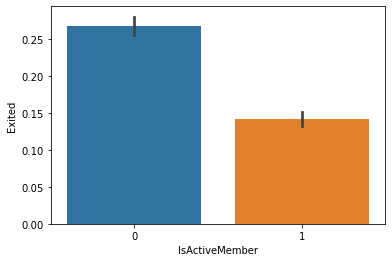

In [14]:
sns.barplot(
    data=churn_data, 
    x='IsActiveMember', 
    y='Exited'
    )

Заключение: Доля ушедших среди активных клиентов банка меньше, чем среди неактивных. Чтобы уменьшить отток клиентов, банку необходимо разрабатывать новые продукты, которые могли бы заинтересовать неактивных клиентов.

#### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [20]:
chorop_data = churn_data.groupby(['Geography'], as_index=False).mean()
fig = px.choropleth(
    data_frame=chorop_data, #DataFrame
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    title='Outflow of bank clients', #заголовок
    width=700, #ширина
    height=500, #высота
    color_continuous_scale='tropic' #палитра цветов
)
#отображаем график
fig.show()

Заключение: Самая большая доля ушедших клиентов в Германии 32%. Во Франции и Испании эта доля равна 16.1% и 16.6%, соответственно. Это может говорить о том, что в развитых странах Европы конкуренция в банковской сфере высокая. Работа менеджмента рассматриваемого банка уступает работе конкурентов.

#### 9.10. 1) Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [21]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [38]:
CreditScoreCat = churn_data['CreditScore'].apply(get_credit_score_cat)
display(CreditScoreCat)

0            Fair
1            Fair
2            Poor
3            Good
4       Excellent
          ...    
9995         Good
9996         Poor
9997         Good
9998         Good
9999    Excellent
Name: CreditScore, Length: 10000, dtype: object

#### 2) Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [50]:
tmp_df = churn_data.copy()
tmp_df['CreditScoreCat'] = tmp_df['CreditScore'].apply(get_credit_score_cat)
tmp_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


In [58]:
pivot = pd.pivot_table(
    tmp_df, 
    values='Exited', 
    index=['CreditScoreCat'], 
    columns=['Tenure'], 
    )
display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


#### 3) На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

<AxesSubplot:xlabel='Tenure', ylabel='CreditScoreCat'>

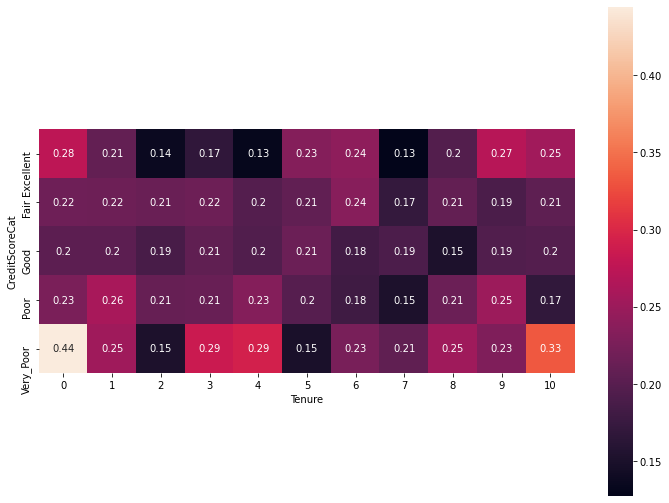

In [65]:
plt.figure(figsize=(12, 9))
sns.heatmap(pivot, annot=True, square=True)

Заключение: По тепловой карте можно сделать вывод, что чаще всего уходят клиенты с низким кредитным рейтингом и с малым количеством лет пользования услугами банка.